In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

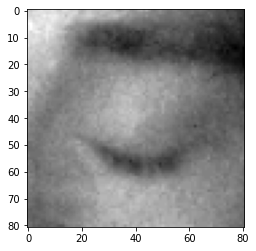

In [ ]:
img1=cv2.imread("/content/drive/MyDrive/eye_dataset/train/Closed_Eyes/s0001_00006_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img1,cmap="gray")

In [ ]:
img1.shape

(81, 81)

In [ ]:
train_data=[]
img_size=224
def train_data_preprocessing(direc="/content/drive/MyDrive/eye_dataset/train"):
  
  categories=["Closed_Eyes","Open_Eyes"]
  for category in categories:
    
    path=os.path.join(direc,category)
    class_num=categories.index(category)
    for img in os.listdir(path):
      
      img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      rgb_img=cv2.cvtColor(img_arr,cv2.COLOR_GRAY2RGB)
      img_array=cv2.resize(rgb_img,(img_size,img_size))
      train_data.append([img_array,class_num])


train_data_preprocessing()      


In [ ]:
print(len(train_data))

4010


In [ ]:
import random
random.shuffle(train_data)

In [ ]:
X=[]
y=[]
for features,label in train_data:
  X.append(features)
  y.append(label)

X=np.array(X).reshape(-1,img_size,img_size,3)  


In [ ]:
X.shape

(4010, 224, 224, 3)

In [ ]:
X=X/255.0

In [ ]:
Y=np.array(y)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model=tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
base_input=model.layers[0].input

In [ ]:
base_output=model.layers[-4].output

In [ ]:
flatten_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(flatten_layer)
output=layers.Activation('sigmoid')(final_output)

In [ ]:
new_model=keras.Model(inputs=base_input,outputs=output)

In [ ]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history=new_model.fit(X,Y,epochs=3,validation_split=0.2)

Epoch 1/3
101/101 [==============================] - 18s 158ms/step - loss: 0.0739 - accuracy: 0.9620 - val_loss: 0.0484 - val_accuracy: 0.9888
Epoch 2/3
101/101 [==============================] - 15s 153ms/step - loss: 5.3858e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/3
101/101 [==============================] - 15s 152ms/step - loss: 1.6602e-05 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9988


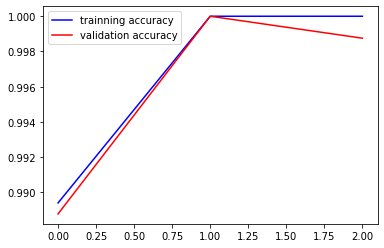

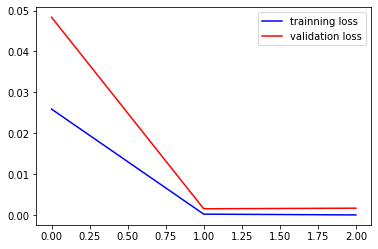

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
new_model.save('eye.h5')

In [ ]:
img2=cv2.imread("/content/drive/MyDrive/eye_dataset/train/Open_Eyes/s0001_02364_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)
RGBIMG=cv2.cvtColor(img2,cv2.COLOR_GRAY2RGB)
NEW=cv2.resize(RGBIMG,(img_size,img_size))

In [ ]:
X_input=np.array(NEW).reshape(1,img_size,img_size,3)

In [ ]:
X_input.shape

(1, 224, 224, 3)

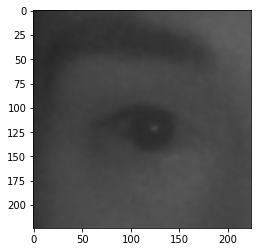

In [ ]:
plt.imshow(NEW)

In [ ]:
X_input=X_input/255.0

In [ ]:
prediction=new_model.predict(X_input)

In [ ]:
prediction

array([[1.]], dtype=float32)